## Hotel Cancellation Exploratory Data Analysis

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
#Read and load data
df = pd.read_csv("./hotel_bookings.csv")
df1 = pd.read_csv("./hotel_bookings.csv")

#Display data
pd.set_option('display.max_columns', 500)
df.head()


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

### Shape of data 

In [104]:
print(df.shape)

(119390, 32)


# Describe The Data

# Information about data 

In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# The Data Quality Report 

In [106]:
df.describe()


is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

# The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

# Data from city hotel and resort hotel

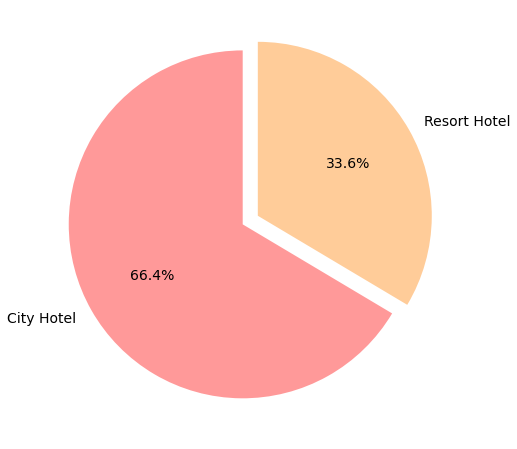

In [107]:
import matplotlib.colors as mcolors

# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#ff9999', '#ffcc99']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

# Checking the missing values in data 

In [108]:
print(round(100*(df.isnull().sum()/len(df.index)),2))


hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


# Check missing values in using graph

Number of missings in children = 4
Number of missings in country = 488
Number of missings in agent = 16340
Number of missings in company = 112593


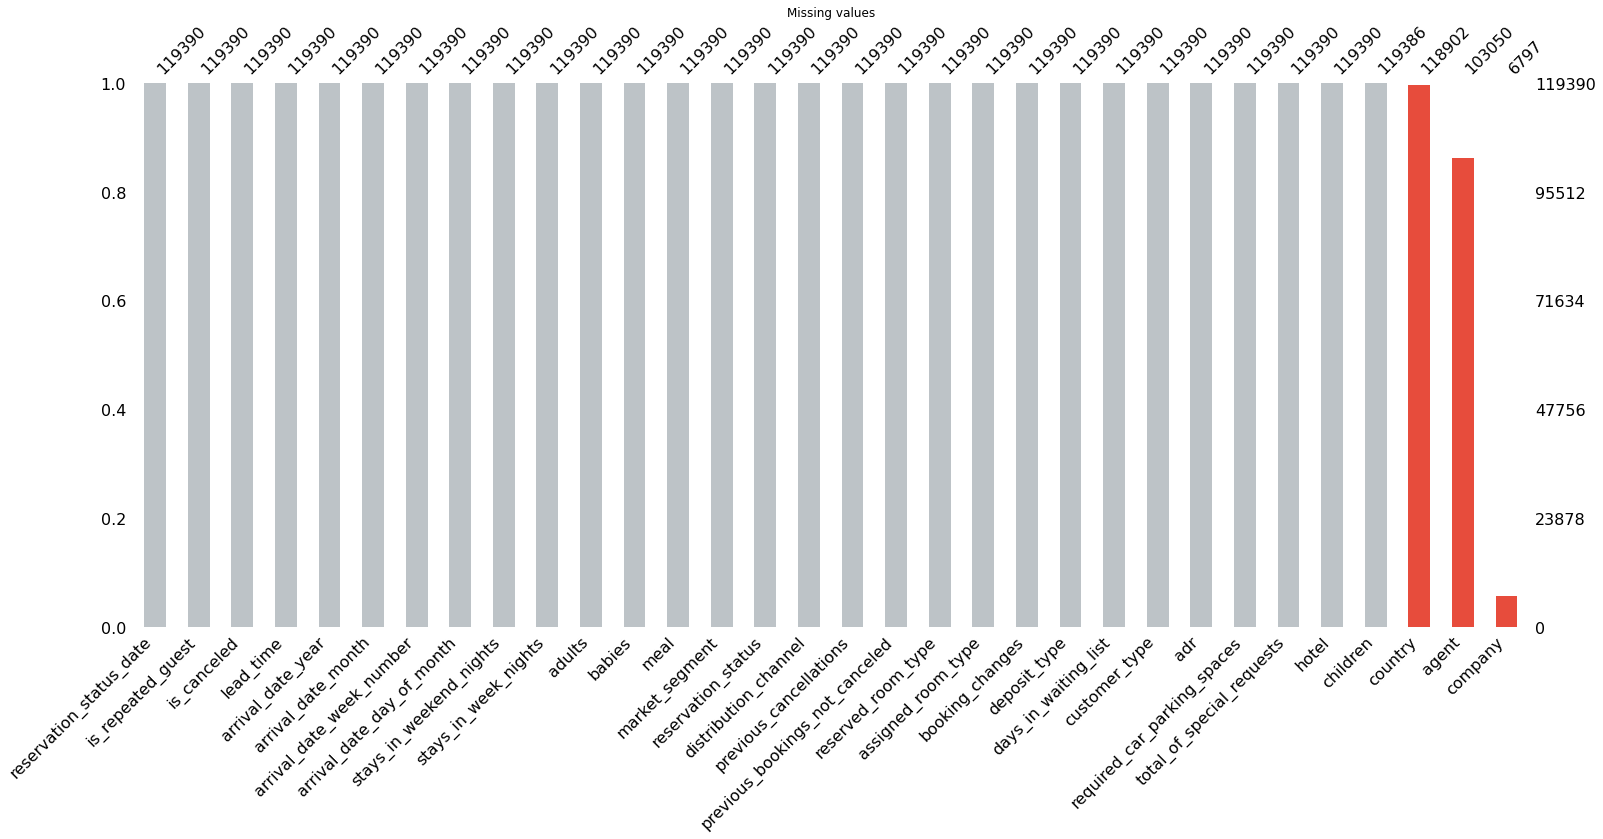

In [109]:
import missingno as msno
# msno.bar(df)
# plt.show()
for i in df:
    nulls = df[i].isnull().sum()
    if nulls>0:
        print(f"Number of missings in {i} = {nulls}")
fig, ax = plt.subplots(figsize = (12,8))
colors = ['#bdc3c7']*29 +['#e74c3c']*3
msno.bar(df, sort='descending',color=colors)
ax.set_title('Missing values')
fig.show()

# Correlation of Missing Data

<AxesSubplot:>

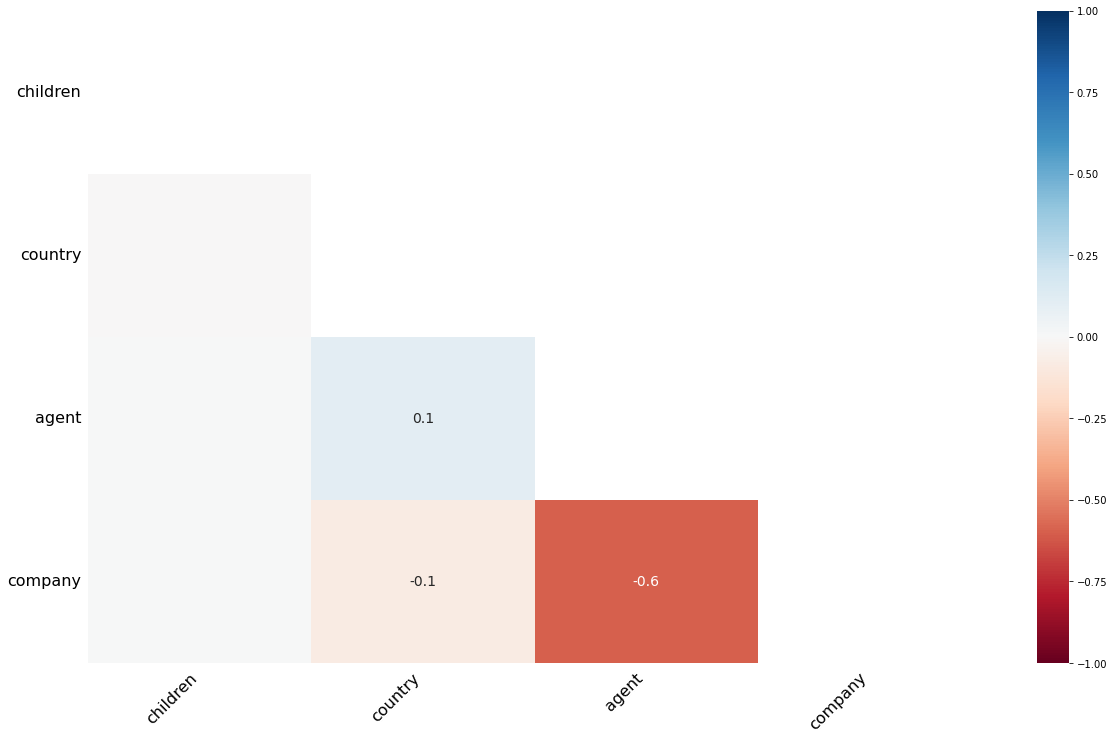

In [110]:
msno.heatmap(df)


# There is a 1% Relationship Between the Agent and the Company.

# Remove the High Missing Values From Data 

In [111]:
df=df.drop(['agent','company'],axis=1)


# Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove the rows.

In [112]:
df = df.dropna(axis = 0)


# Check Null Values 

In [113]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Identify Continuous and Categorical Variables


In [114]:
def var(df):
    unique_list = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(df.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(df)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)


Continuous Variables ( 13 )
 {'stays_in_weekend_nights', 'arrival_date_week_number', 'previous_cancellations', 'stays_in_week_nights', 'arrival_date_day_of_month', 'lead_time', 'adr', 'booking_changes', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'country', 'adults', 'reservation_status_date'} 

Categorical Variables( 17 )
 {'is_canceled', 'customer_type', 'children', 'total_of_special_requests', 'arrival_date_month', 'is_repeated_guest', 'deposit_type', 'reserved_room_type', 'required_car_parking_spaces', 'market_segment', 'hotel', 'assigned_room_type', 'babies', 'arrival_date_year', 'distribution_channel', 'reservation_status', 'meal'}


# Checking the Outliers

[Text(1, 0, 'lead_time'),
 Text(2, 0, 'stays_in_weekend_nights'),
 Text(3, 0, 'stays_in_week_nights'),
 Text(4, 0, 'adults'),
 Text(5, 0, 'children'),
 Text(6, 0, 'adr')]

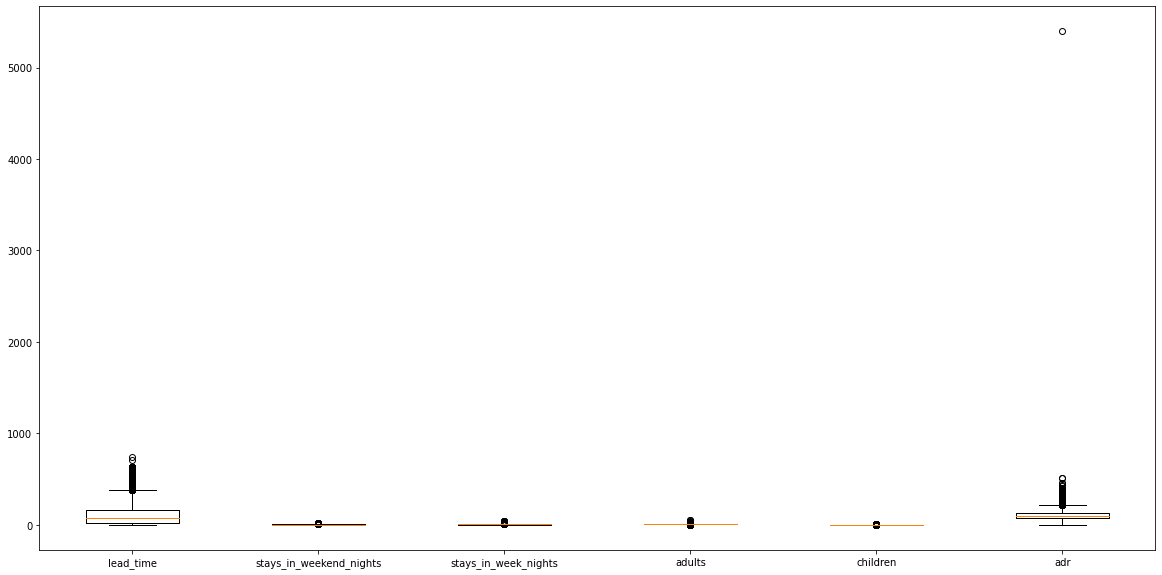

In [115]:
# Creating axes instance

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children','adr']
my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}

fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(df[features])
ax.set_xticklabels(features)


In [116]:
df[con_var].describe()


stays_in_weekend_nights  arrival_date_week_number  \
count            118898.000000             118898.000000   
mean                  0.928897                 27.166555   
std                   0.996216                 13.589971   
min                   0.000000                  1.000000   
25%                   0.000000                 16.000000   
50%                   1.000000                 28.000000   
75%                   2.000000                 38.000000   
max                  16.000000                 53.000000   

       previous_cancellations  stays_in_week_nights  \
count           118898.000000         118898.000000   
mean                 0.087142              2.502145   
std                  0.845869              1.900168   
min                  0.000000              0.000000   
25%                  0.000000              1.000000   
50%                  0.000000              2.000000   
75%                  0.000000              3.000000   
max                 26.000000             41.000000   

       arrival_date_day_of_month      lead_time            adr  \
count              118898.000000  118898.000000  118898.000000   
mean                   15.800880     104.311435     102.003243   
std                     8.780324     106.903309      50.485862   
min                     1.000000       0.000000      -6.380000   
25%                     8.000000      18.000000      70.000000   
50%                    16.000000      69.000000      95.000000   
75%                    23.000000     161.000000     126.000000   
max                    31.000000     737.000000    5400.000000   

       booking_changes  previous_bookings_not_canceled  days_in_waiting_list  \
count    118898.000000                   118898.000000         118898.000000   
mean          0.221181                        0.131634              2.330754   
std           0.652785                        1.484672             17.630452   
min           0.000000                        0.000000              0.000000   
25%           0.000000                        0.000000              0.000000   
50%           0.000000                        0.000000              0.000000   
75%           0.000000                        0.000000              0.000000   
max          21.000000                       72.000000            391.000000   

              adults  
count  118898.000000  
mean        1.858391  
std         0.578576  
min         0.000000  
25%         2.000000  
50%         2.000000  
75%         2.000000  
max        55.000000

# List of Continuous Variables with Outliers identified through Summary Statistics are:

## LeadTime
## WaitingDays
## WeekendStay
## Adults
## PrevBook
## PrevCancel
## WeekStay
# List of Continuous Variables which should be Categorical
## PrevBook
## PrevCancel

# babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

In [117]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]


hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

# After Removing

In [118]:

df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

# From Where the Most Guest are Coming

In [119]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

Country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

# Let’s visualized using graphics visualization



In [120]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

## Most Guests are from Portugal and other Countries in Europe.



In [121]:
# 

<AxesSubplot:ylabel='is_canceled'>

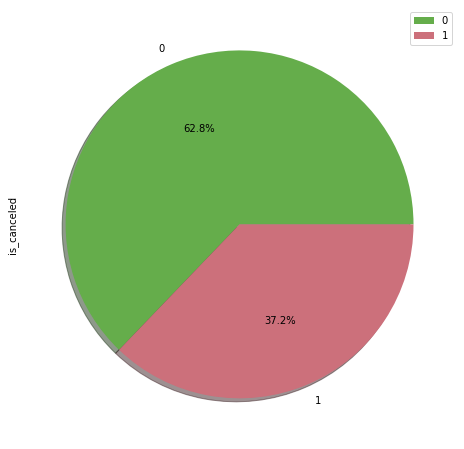

In [122]:
cols = ['#65ad4b', '#cc707b']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols, legend=True)


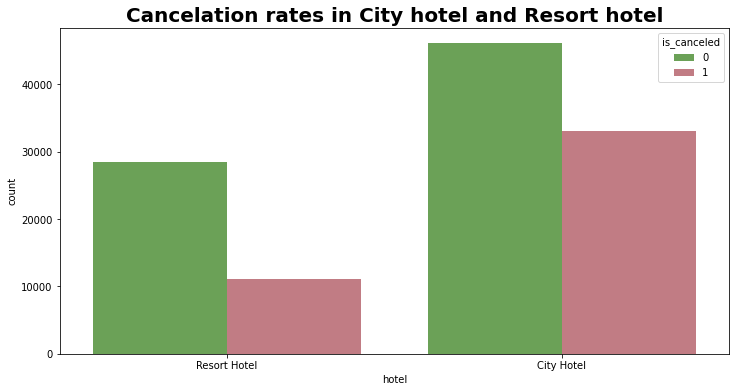

In [123]:
plt.figure(figsize=(12, 6))

sns.countplot(x='hotel',hue="is_canceled", data=df, palette= ['#65ad4b', '#cc707b'])
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

# What are the Room prices overnights for each month that is not cancelled

In [124]:
data = df[df['is_canceled'] == 0]
px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

In [125]:
import sort_dataframeby_monthorweek as sd
#How does the price vary per night over the year?
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']



final_hotel
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices
plt.figure(figsize = (17, 8))
px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .

In [126]:
#Which are the most busy months?
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')


The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Both hotels have the fewest guests during the winter.

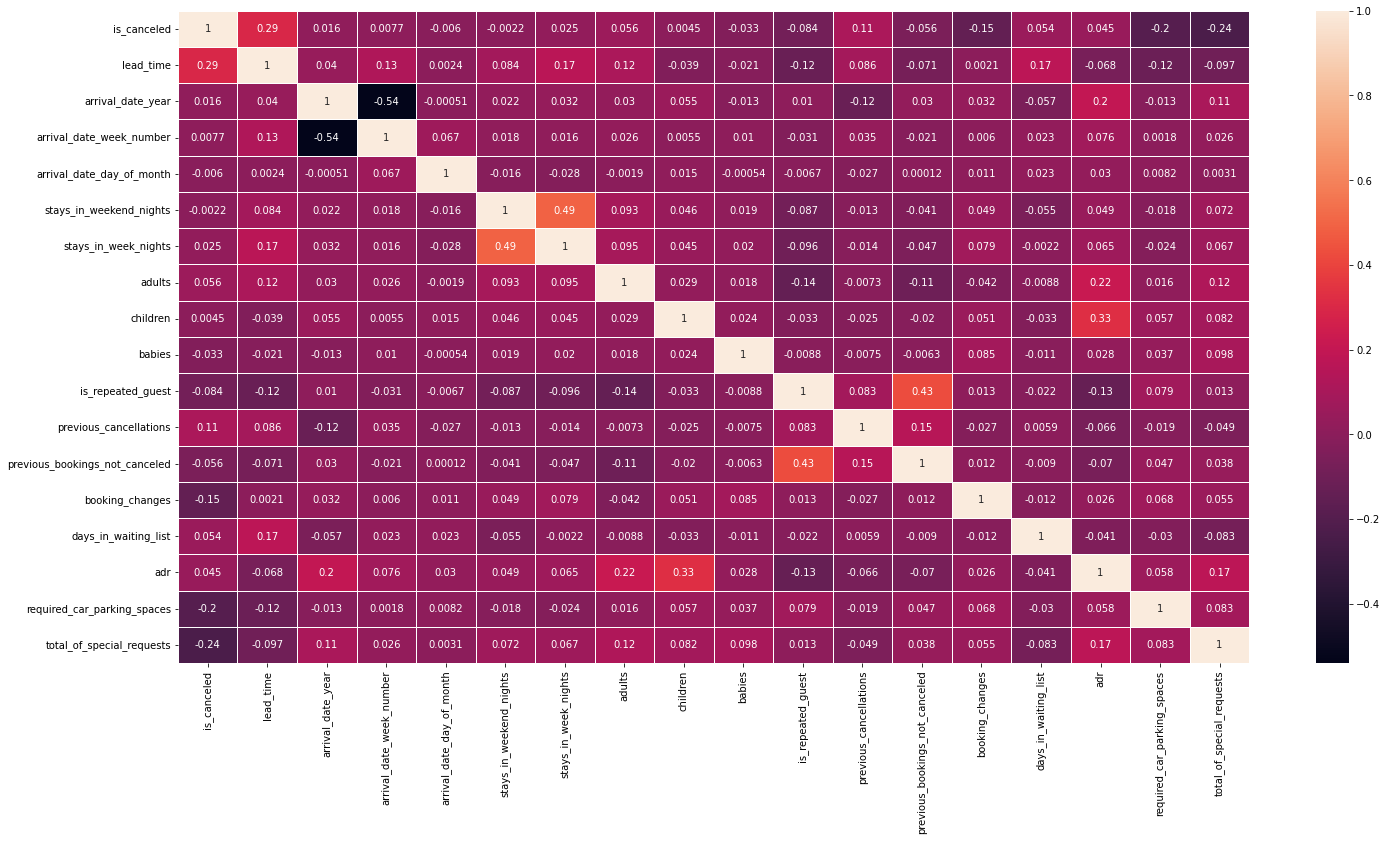

In [127]:
plt.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()